<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the components of an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN/LSTM to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [1]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [2]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [7]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

batch_size = 46
max_features = len(word_index.values())
maxlen = 200

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


print('Build model...')
# TODO - your code!
model = Sequential()
model.add(Embedding((max_features + 1), 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense((max_features + 1), activation='relu'))


8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 200)
X_test shape: (2246, 200)
Build model...


In [8]:
# You should only run this cell once your model has been properly configured

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(X_test, y_test))
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)

print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 8982 samples, validate on 2246 samples
Epoch 1/5
8982/8982 [==============================] - 54s 6ms/sample - loss: 4.7331 - accuracy: 0.3927 - val_loss: 4.6994 - val_accuracy: 0.4840
Epoch 2/5
8982/8982 [==============================] - 49s 5ms/sample - loss: 4.8004 - accuracy: 0.5063 - val_loss: 5.6800 - val_accuracy: 0.4773
Epoch 3/5
8982/8982 [==============================] - 49s 6ms/sample - loss: 4.4634 - accuracy: 0.5374 - val_loss: 5.5159 - val_accuracy: 0.4016
Epoch 4/5
8982/8982 [==============================] - 52s 6ms/sample - loss: 4.2344 - accuracy: 0.5607 - val_loss: 4.3195 - val_accuracy: 0.5436
Epoch 5/5
8982/8982 [==============================] - 52s 6ms/sample - loss: 4.7035 - accuracy: 0.3611 - val_loss: 4.5545 - val_accuracy: 0.2409
2246/1 [=============================================================================================================================================================================================================

Test score: 4.554522724312963
Test accuracy: 0.24087267


## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

_'pad_sequences'_ is used to ensure that the Sequences have the same length. It "Pads" the short sequences with some value, in this case, the default '0'.

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

LSTMs are used over RNNs because they address the 'Vanishing/Exploding Gradient Problems' that can occur with RNNs.

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

1. Text Recognition <br/>
2. Speech Recognition <br/>
3. Text Classification <br/>
RNN, and specifically LSTM are suited for the above cases (and many other language modeling problems) because of the ordered nature of language. 


<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [1]:
!pip install google_images_download

In [2]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "lilly frog pond", "limit": 5, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = lilly frog pond
Evaluating...
Starting Download...
Image URL: http://www.slrobertson.com/images/usa/georgia/atlanta/atl-botanical-gardens/frog-lily-pond-2-b.jpg
Completed Image ====> 1.frog-lily-pond-2-b.jpg
Image URL: https://cdn.pixabay.com/photo/2017/07/14/17/44/frog-2504507_960_720.jpg
Completed Image ====> 2.frog-2504507_960_720.jpg
Image URL: https://www.welcomewildlife.com/wp-content/uploads/2015/01/Frog-on-lily-pad.jpg
Completed Image ====> 3.Frog-on-lily-pad.jpg
Image URL: https://i.pinimg.com/originals/9a/49/08/9a49083d4d7458a194a451eea757a444.jpg
Completed Image ====> 4.9a49083d4d7458a194a451eea757a444.jpg
Image URL: https://s3.amazonaws.com/assets.cce.cornell.edu/slides/22531/image/sized/Ponds5.jpg?1437939118
Completed Image ====> 5.Ponds5.jpg

Errors: 0



In [3]:
absolute_image_paths

({'lilly frog pond': ['/home/ubuntu/Github/DS-Unit-4-Sprint-3-Deep-Learning/downloads/lilly frog pond/1.frog-lily-pond-2-b.jpg',
   '/home/ubuntu/Github/DS-Unit-4-Sprint-3-Deep-Learning/downloads/lilly frog pond/2.frog-2504507_960_720.jpg',
   '/home/ubuntu/Github/DS-Unit-4-Sprint-3-Deep-Learning/downloads/lilly frog pond/3.Frog-on-lily-pad.jpg',
   '/home/ubuntu/Github/DS-Unit-4-Sprint-3-Deep-Learning/downloads/lilly frog pond/4.9a49083d4d7458a194a451eea757a444.jpg',
   '/home/ubuntu/Github/DS-Unit-4-Sprint-3-Deep-Learning/downloads/lilly frog pond/5.Ponds5.jpg']},
 0)

At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals* 
- Check for fish or other labels
- Create a matplotlib visualizations of the images and your prediction as the visualization label

In [20]:
# You've got something to do in this cell. ;)

import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
    """ Scans image for Frogs
    
    Should return a boolean (True/False) if a frog is in the image.
    
    Inputs:
    ---------
    img:  Precrossed image ready for prediction. The `process_img_path`             function should already be applied to the image. 
    
    Returns: 
    ---------
    frogs (boolean):  TRUE or FALSE - There are frogs in the image.
    
    """
    # Your Code Here
    # TODO - your code!
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    X = preprocess_input(X)
    model = ResNet50(weights='imagenet')
    features = model.predict(X)
    results = decode_predictions(features, top=3)[0]
    print(results, len(results))
    for entry in results:
        if entry[1] == 'bullfrog' or entry[1] == 'tree_frog' or entry[1] == 'tailed_frog':
            return print('YES! There are frogs in the image')
#         else:
#             return print('NO! There are no frogs in the image')
    return print('NO! There are no frogs in the image')

In [21]:
img_contains_frog(process_img_path('/home/ubuntu/Github/DS-Unit-4-Sprint-3-Deep-Learning/downloads/lilly frog pond/1.frog-lily-pond-2-b.jpg'))


[('n03991062', 'pot', 0.7243715), ('n01641577', 'bullfrog', 0.045519818), ('n01667778', 'terrapin', 0.04263535)] 3
YES! There are frogs in the image


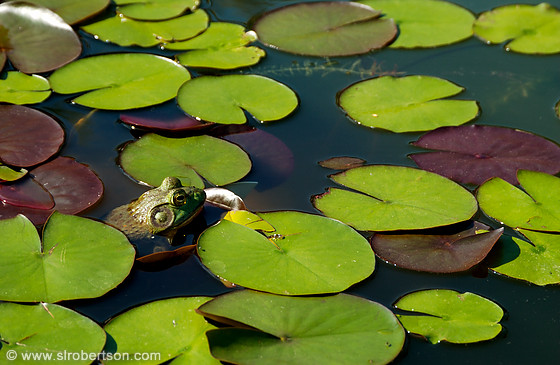

In [27]:
from IPython.display import Image
Image(filename='/home/ubuntu/Github/DS-Unit-4-Sprint-3-Deep-Learning/downloads/lilly frog pond/1.frog-lily-pond-2-b.jpg', width=600)

In [22]:
img_contains_frog(process_img_path('/home/ubuntu/Github/DS-Unit-4-Sprint-3-Deep-Learning/downloads/lilly frog pond/2.frog-2504507_960_720.jpg'))

[('n01641577', 'bullfrog', 0.3586052), ('n01644900', 'tailed_frog', 0.3063647), ('n01737021', 'water_snake', 0.15603572)] 3
YES! There are frogs in the image


In [23]:
img_contains_frog(process_img_path('/home/ubuntu/Github/DS-Unit-4-Sprint-3-Deep-Learning/downloads/lilly frog pond/3.Frog-on-lily-pad.jpg'))

[('n02190166', 'fly', 0.13405173), ('n07718472', 'cucumber', 0.11413096), ('n07716358', 'zucchini', 0.08889673)] 3
NO! There are no frogs in the image


In [24]:
img_contains_frog(process_img_path('/home/ubuntu/Github/DS-Unit-4-Sprint-3-Deep-Learning/downloads/lilly frog pond/4.9a49083d4d7458a194a451eea757a444.jpg'))

[('n04476259', 'tray', 0.64191407), ('n03485794', 'handkerchief', 0.1880797), ('n01644373', 'tree_frog', 0.014359097)] 3
YES! There are frogs in the image


In [25]:
img_contains_frog(process_img_path('/home/ubuntu/Github/DS-Unit-4-Sprint-3-Deep-Learning/downloads/lilly frog pond/5.Ponds5.jpg'))

[('n03991062', 'pot', 0.1506036), ('n12620546', 'hip', 0.09164858), ('n01773797', 'garden_spider', 0.06739452)] 3
NO! There are no frogs in the image


#### Stretch Goal: Displaying Predictions

In [ ]:
import matplotlib.pyplot as plt



<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer: One use case for an autoencoder is Reverse image searching. The image is encoded then reconstructed by the autoencoder. This reconstructed (simplified) image can then be used for similarity retrievals in the chosen training dataset.*__ 

<a id="p4"></a>
## Part 4 - More...

In [13]:
import requests

image_urls = ["http://www.slrobertson.com/images/usa/georgia/atlanta/atl-botanical-gardens/frog-lily-pond-2-b.jpg",
              "https://cdn.pixabay.com/photo/2017/07/14/17/44/frog-2504507_960_720.jpg",
              "https://www.welcomewildlife.com/wp-content/uploads/2015/01/Frog-on-lily-pad.jpg",
              "https://i.pinimg.com/originals/9a/49/08/9a49083d4d7458a194a451eea757a444.jpg",
              "https://s3.amazonaws.com/assets.cce.cornell.edu/slides/22531/image/sized/Ponds5.jpg?1437939118"]

for _id,img in enumerate(image_urls): 
    r = requests.get(img)
    with open(f'example{_id}.jpg', 'wb') as f:
        f.write(r.content)

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
    
    **My strongest area is Predictive Modeling. I find that I excel at the more detail oriented aspects of Data Science in general, and the feature engineering and hyperparameter optimization required to create efficient and accurate models is where I shine.** 
 
 
- What area of Data Science would you most like to learn more about, and why?
    
    **I would like to learn more about SQL. For how widespread it is in the Data science/analysis/engineering fields, I feel like we only scratched the surface during class and I would like to get more practice with it.**
 
 
- Where do you think Data Science will be in 5 years?
    
    **I think that Machine learning is moving forawrd in leaps and bounds. Unfortunately with the geo-political climate that we find ourselves in, I think that a great many new data scientists will find themselves working with security applications, for both private and public entities.**
 
 
- What are the threats posed by AI to our society?
    
    **Intelligence without discernment is a 18 wheeler without brakes. Once it gets going, only a catastrophic incident can stop it. It heartens me to think that the development of AI may lead to the end of almost every recorded disease that plagues the world today, but on the other end...Anthrax. A group of extremely intelligent men brought an end to the most devestating war in recorded history, by inventing the most devestating weapon in recorded history. What could an extremely intelligent group of computers do to/for the world?**
 
 
- How do you think we can counteract those threats? 
    
    **The same thing that we did during/after WW2, convince the greatest minds that curing diseases is better than creating them, and that freeing a populace is better than enslaving them. And getting these great minds to work on countering this threats as they arise, and giving them all the resources they would need to do so.**
 
 
- Do you think achieving General Artifical Intelligence is ever possible?
    
    **In 2001, while I was a freshman in college, Columbia University was testing a Terabyte drive that was took up most of the wall in a room in a lab. In 2020 that'll be in a microsd card. I think that General Artificial Intelligence is pretty much inevitable at this point, as technology never takes backwards steps. Will we see it in my lifetime...I hope not, but it is definitely possible.**

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [26]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")